In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import datetime

import warnings

import uszipcode as zc

# TS decomposition
import statsmodels.api as sm


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [39]:
df = pd.read_csv('./SFRMFR_combined.csv', parse_dates=['Month_Year'])

df.drop(columns = ['Unnamed: 0', 'city', ], inplace=True)

df.head(200)


,Month_Year,census_cbsa_geoid,census_zcta5_geoid,sfr_rental_index,sfr_price_index,coef,Market,mfr_med_rent,mfr_mean_rent,mfr_std_rent,mfr_med_occ,mfr_mean_occ,mfr_std_occ,mfr_mean_rent_index,mfr_med_rent_index,mfr_mean_occ_index,mfr_med_occ_index
0,2010-01-01,12060,30309,100.000000,77.979092,-0.261114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,12060,30309,101.601291,77.507785,-0.261181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-01,12060,30309,99.448626,77.293222,-0.275530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-01,12060,30309,100.546999,76.653083,-0.283132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-01,12060,30309,102.961591,76.577951,-0.257281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-06-01,12060,30309,101.057081,76.409740,-0.276402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-07-01,12060,30309,101.196260,75.980188,-0.295150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-08-01,12060,30309,101.151763,75.565009,-0.294061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-09-01,12060,30309,101.636364,75.049468,-0.317128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-10-01,12060,30309,101.793769,74.565248,-0.322457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Define your set of ZIP codes
zc_set = set(df['census_zcta5_geoid'])

# Look up using zc
# Create a search engine instance
search = zc.SearchEngine()


# Create a empty list to store zipcode lookup
data = []

# Loop through the ZIP codes and lookup their corresponding city
for zipcode in zc_set:
    result = search.by_zipcode(zipcode)
    if result:
        state = result.state
        county = result.county
        city = result.city
        data.append({'zipcode': zipcode, 'State': state, 'City': city, 'County': county})

zc_lookup = pd.DataFrame(data)


In [41]:
df = pd.merge(df, zc_lookup, how = 'left', left_on = 'census_zcta5_geoid', right_on='zipcode')

In [42]:
df.head(200)

,Month_Year,census_cbsa_geoid,census_zcta5_geoid,sfr_rental_index,sfr_price_index,coef,Market,mfr_med_rent,mfr_mean_rent,mfr_std_rent,mfr_med_occ,mfr_mean_occ,mfr_std_occ,mfr_mean_rent_index,mfr_med_rent_index,mfr_mean_occ_index,mfr_med_occ_index,zipcode,State,City,County
0,2010-01-01,12060,30309,100.000000,77.979092,-0.261114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
1,2010-02-01,12060,30309,101.601291,77.507785,-0.261181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
2,2010-03-01,12060,30309,99.448626,77.293222,-0.275530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
3,2010-04-01,12060,30309,100.546999,76.653083,-0.283132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
4,2010-05-01,12060,30309,102.961591,76.577951,-0.257281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
5,2010-06-01,12060,30309,101.057081,76.409740,-0.276402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
6,2010-07-01,12060,30309,101.196260,75.980188,-0.295150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
7,2010-08-01,12060,30309,101.151763,75.565009,-0.294061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
8,2010-09-01,12060,30309,101.636364,75.049468,-0.317128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County
9,2010-10-01,12060,30309,101.793769,74.565248,-0.322457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30309,GA,Atlanta,Fulton County


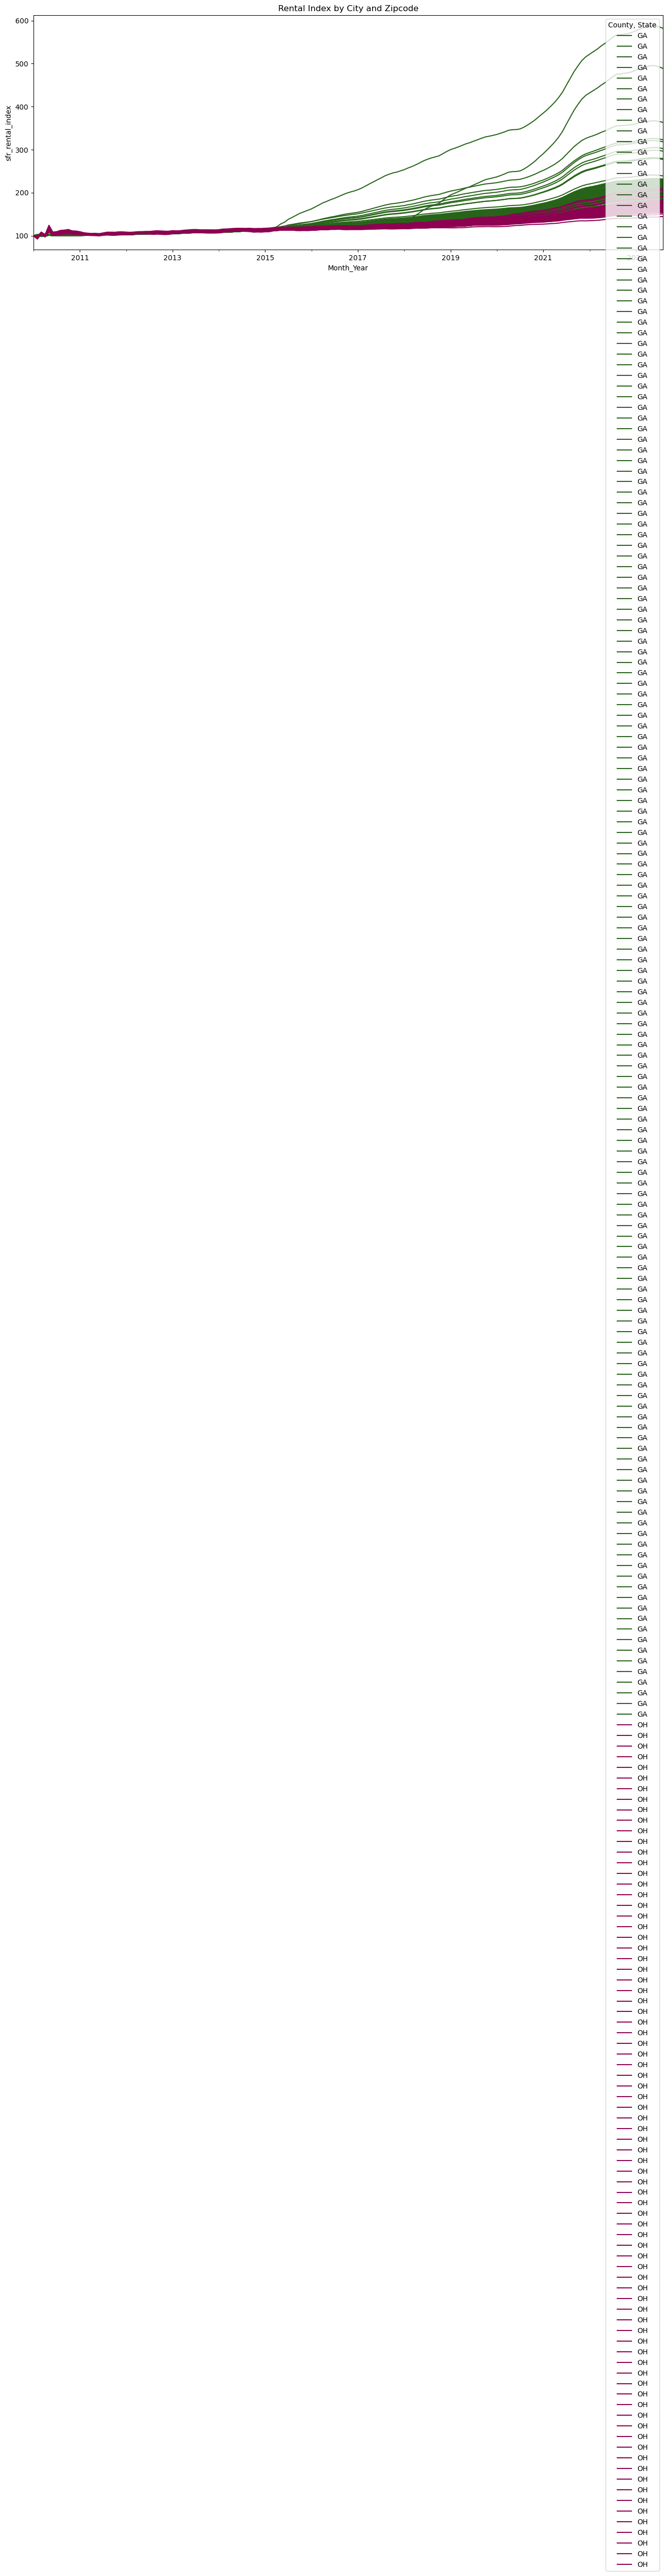

In [58]:
# Group by both 'zipcode' and 'City' and create a plot for each group
grouped = df.groupby(['census_zcta5_geoid','State', 'County'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16, 6))

# Create a colormap with many distinct colors
cmap = plt.get_cmap('PiYG', len(grouped))


# Iterate through each group and plot the data, coloring by 'County' and 'State'
for (zipcode, state, county), group in grouped:
    color = cmap(hash(f"{state}"))  # Get a color from the colormap based on a hash of 'State-County'
    group.plot(x='Month_Year', y='sfr_rental_index', ax=ax, label=state, color=color)

# Add a legend
ax.legend(title='County, State')

# Add labels, titles, etc., if needed
ax.set_xlabel('Month_Year')
ax.set_ylabel('sfr_rental_index')
ax.set_title('Rental Index by City and Zipcode')

# Show the plot
plt.show()

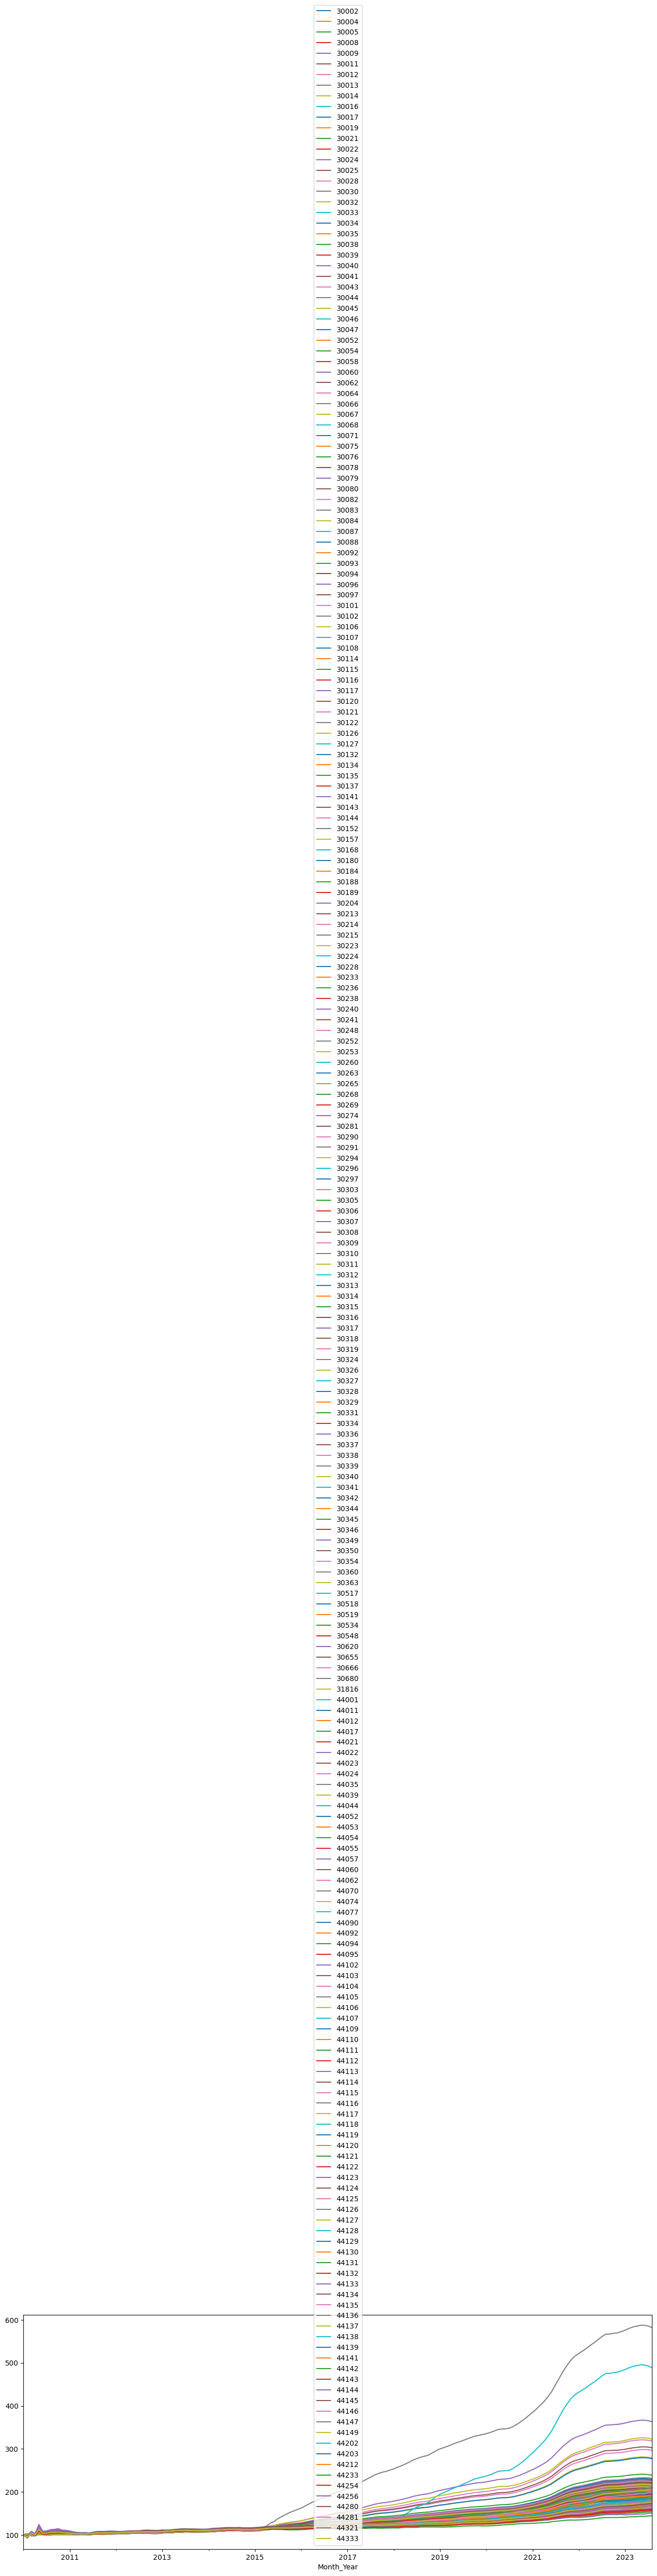

In [9]:
# Group by 'census_zcta5_geoid' and create a plot for each group
grouped = df.groupby('census_zcta5_geoid')['sfr_rental_index']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the data for each group, specify a label for the legend
for name, group in grouped:
    group.plot(ax=ax, label=name)

# Add a legend
ax.legend()

# Add labels, titles, etc., if needed

# Show the plot
plt.show()




# TIME SERIES DECOMPOSITION

In [64]:
df.columns

Index(['Month_Year', 'census_cbsa_geoid', 'census_zcta5_geoid',
       'sfr_rental_index', 'sfr_price_index', 'coef', 'Market', 'mfr_med_rent',
       'mfr_mean_rent', 'mfr_std_rent', 'mfr_med_occ', 'mfr_mean_occ',
       'mfr_std_occ', 'mfr_mean_rent_index', 'mfr_med_rent_index',
       'mfr_mean_occ_index', 'mfr_med_occ_index', 'zipcode', 'State', 'City',
       'County'],
      dtype='object')

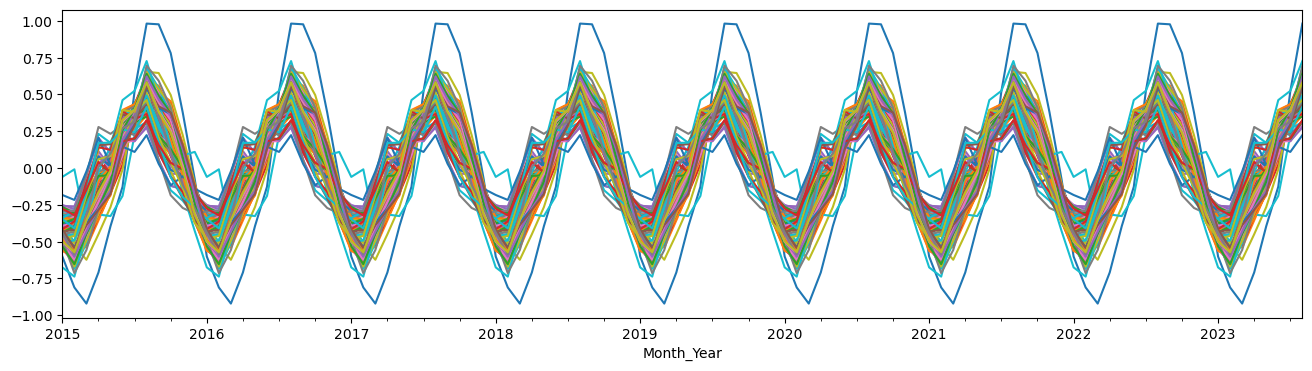

In [75]:
#df.set_index('Month_Year', inplace=True) 
rcParams["figure.figsize"] = 16, 4
unique_zipcodes = df['zipcode'].unique()

# Create a dictionary to store decomposition results for each zipcode
decomposition_results = {}

for zipcode in unique_zipcodes:
    # Filter the DataFrame for the current zipcode
    zipcode_df = df[df['zipcode'] == zipcode]
    
    # Perform time series decomposition
    decomposition = sm.tsa.seasonal_decompose(zipcode_df['sfr_rental_index'], model='additive')
    
    # Store the decomposition results in the dictionary
    decomposition_results[zipcode] = decomposition
    
    # Plot it
    decomposition.seasonal['2015':"2023"].plot();

In [78]:
df['zipcode'].nunique()
240/10

24.0

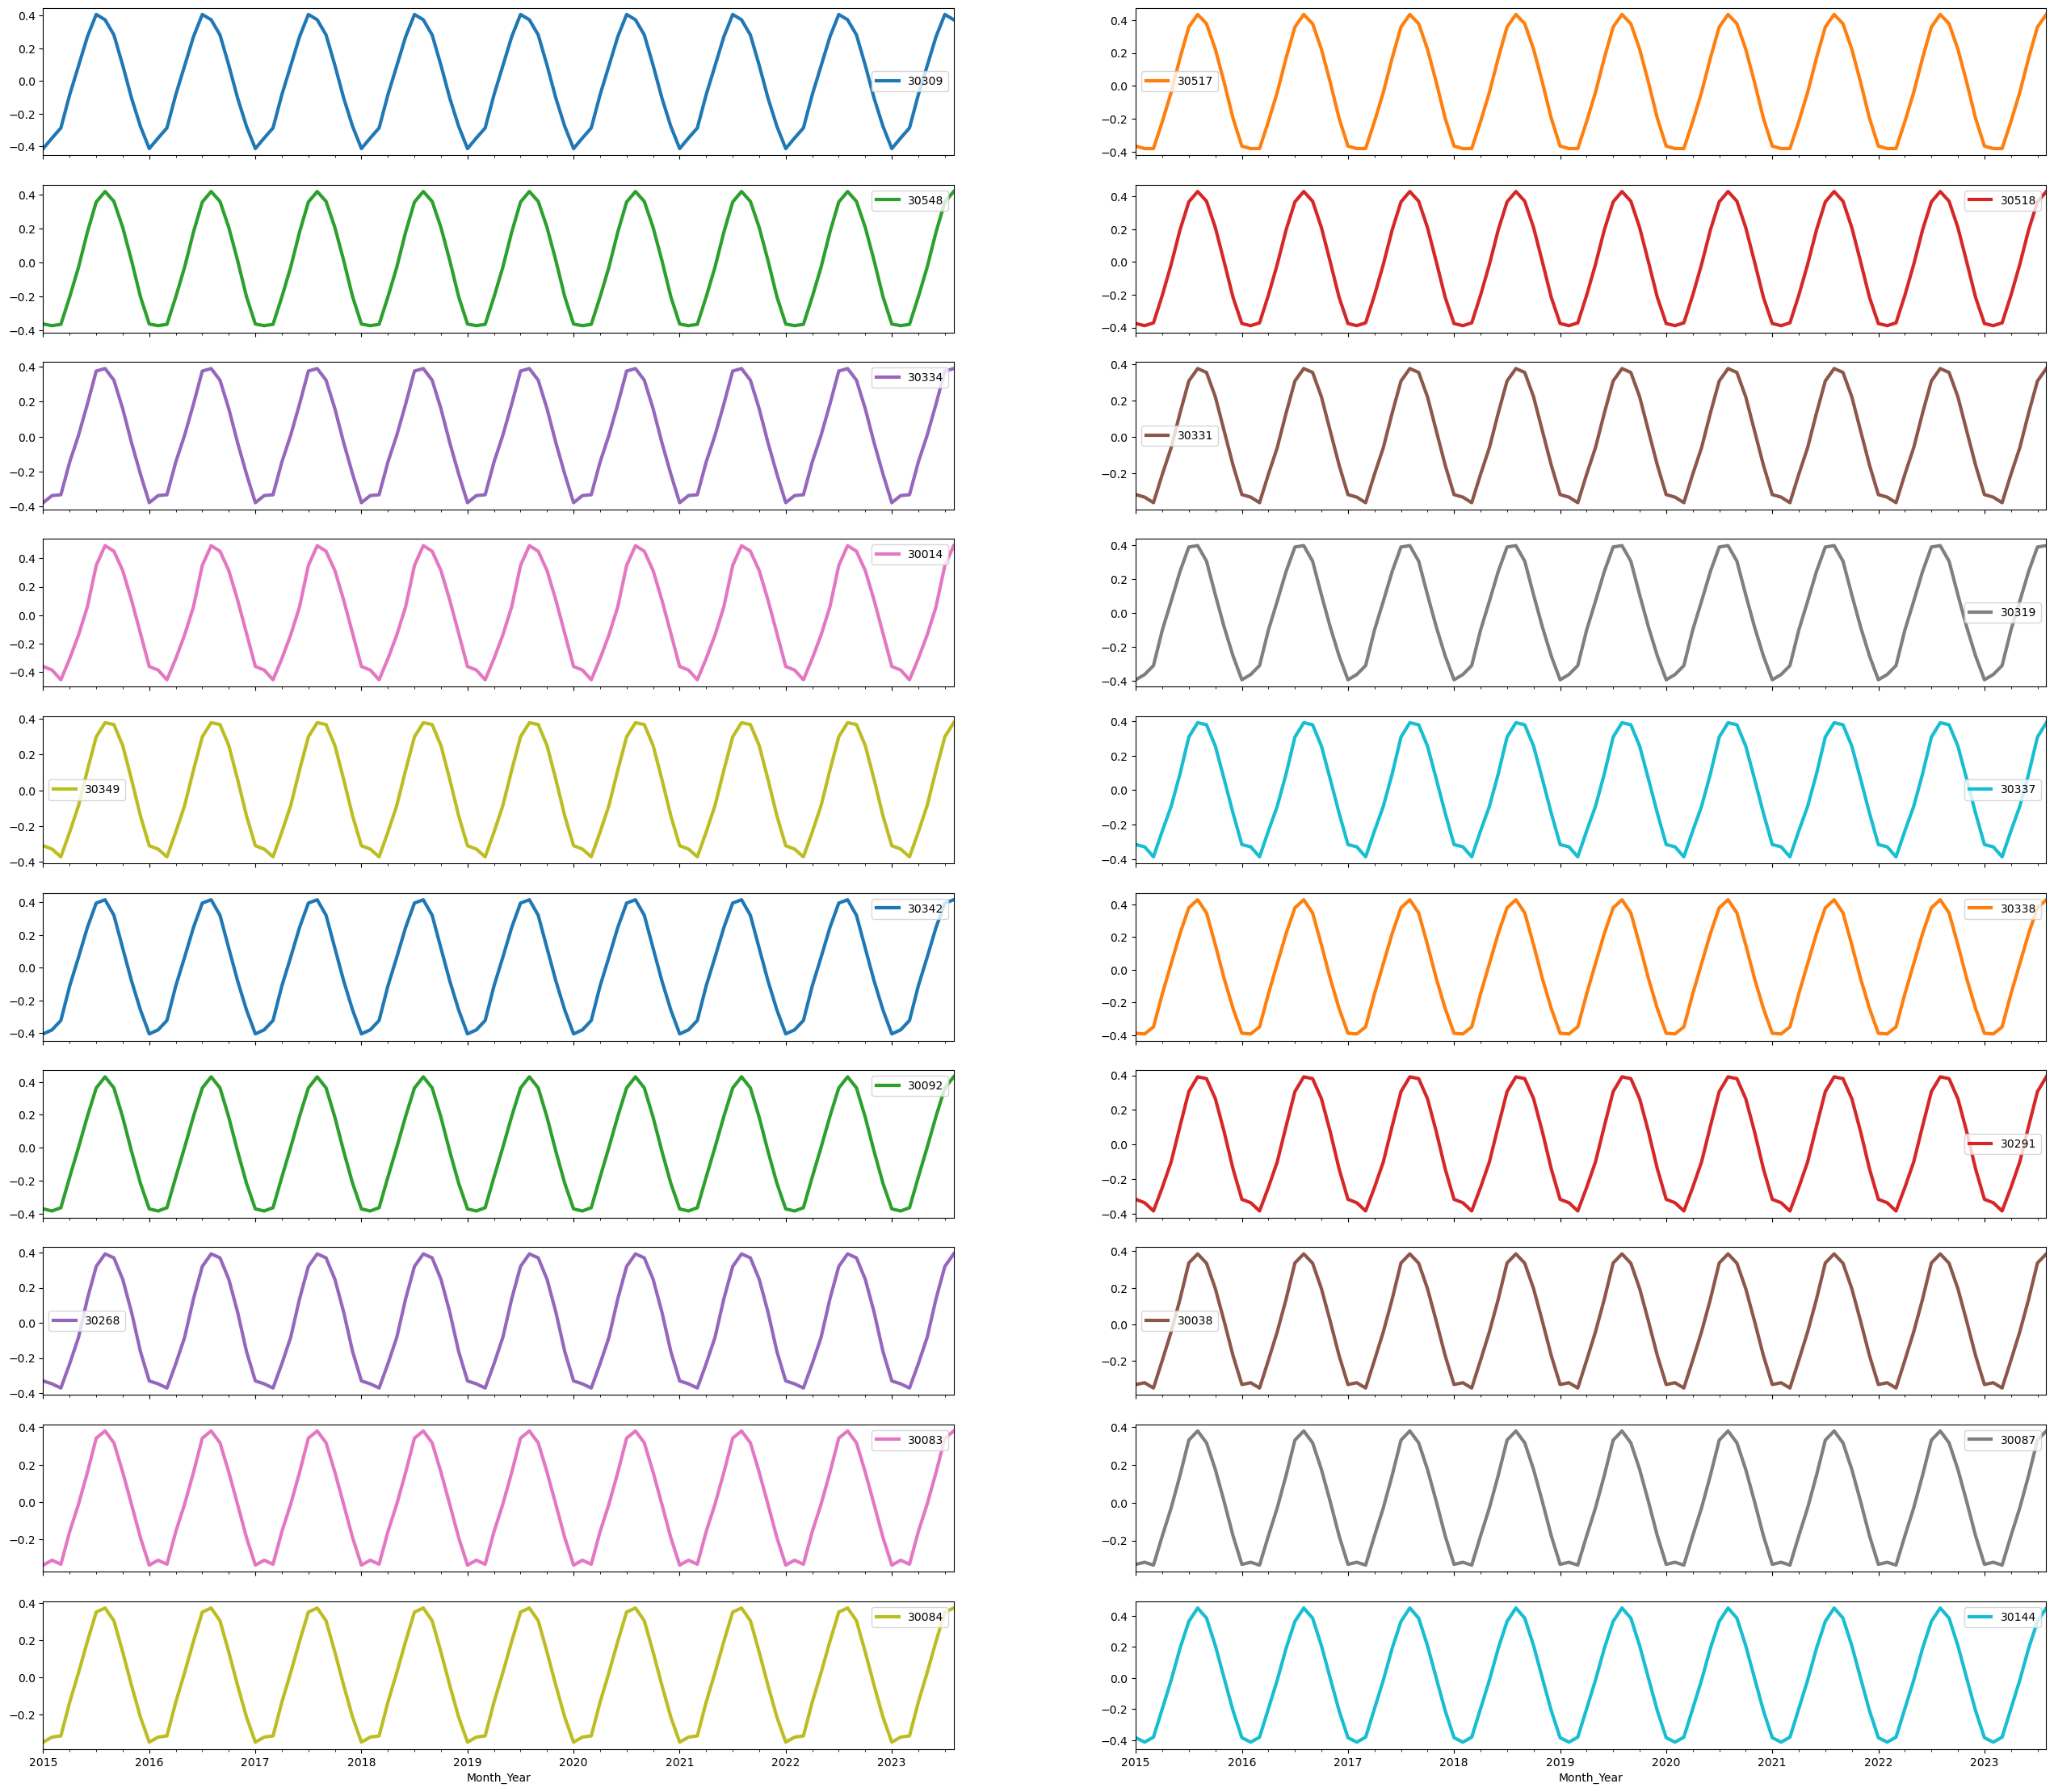

In [83]:
# Init empty dict to store decompose results
seasonality_dict = {}
unique_zc_subset = unique_zipcodes[0:20]
for ts in unique_zc_subset:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 32, 28
pd.DataFrame(seasonality_dict)["2015":"2023"].plot(
    subplots=True, layout=(10, 2), linewidth=3
);

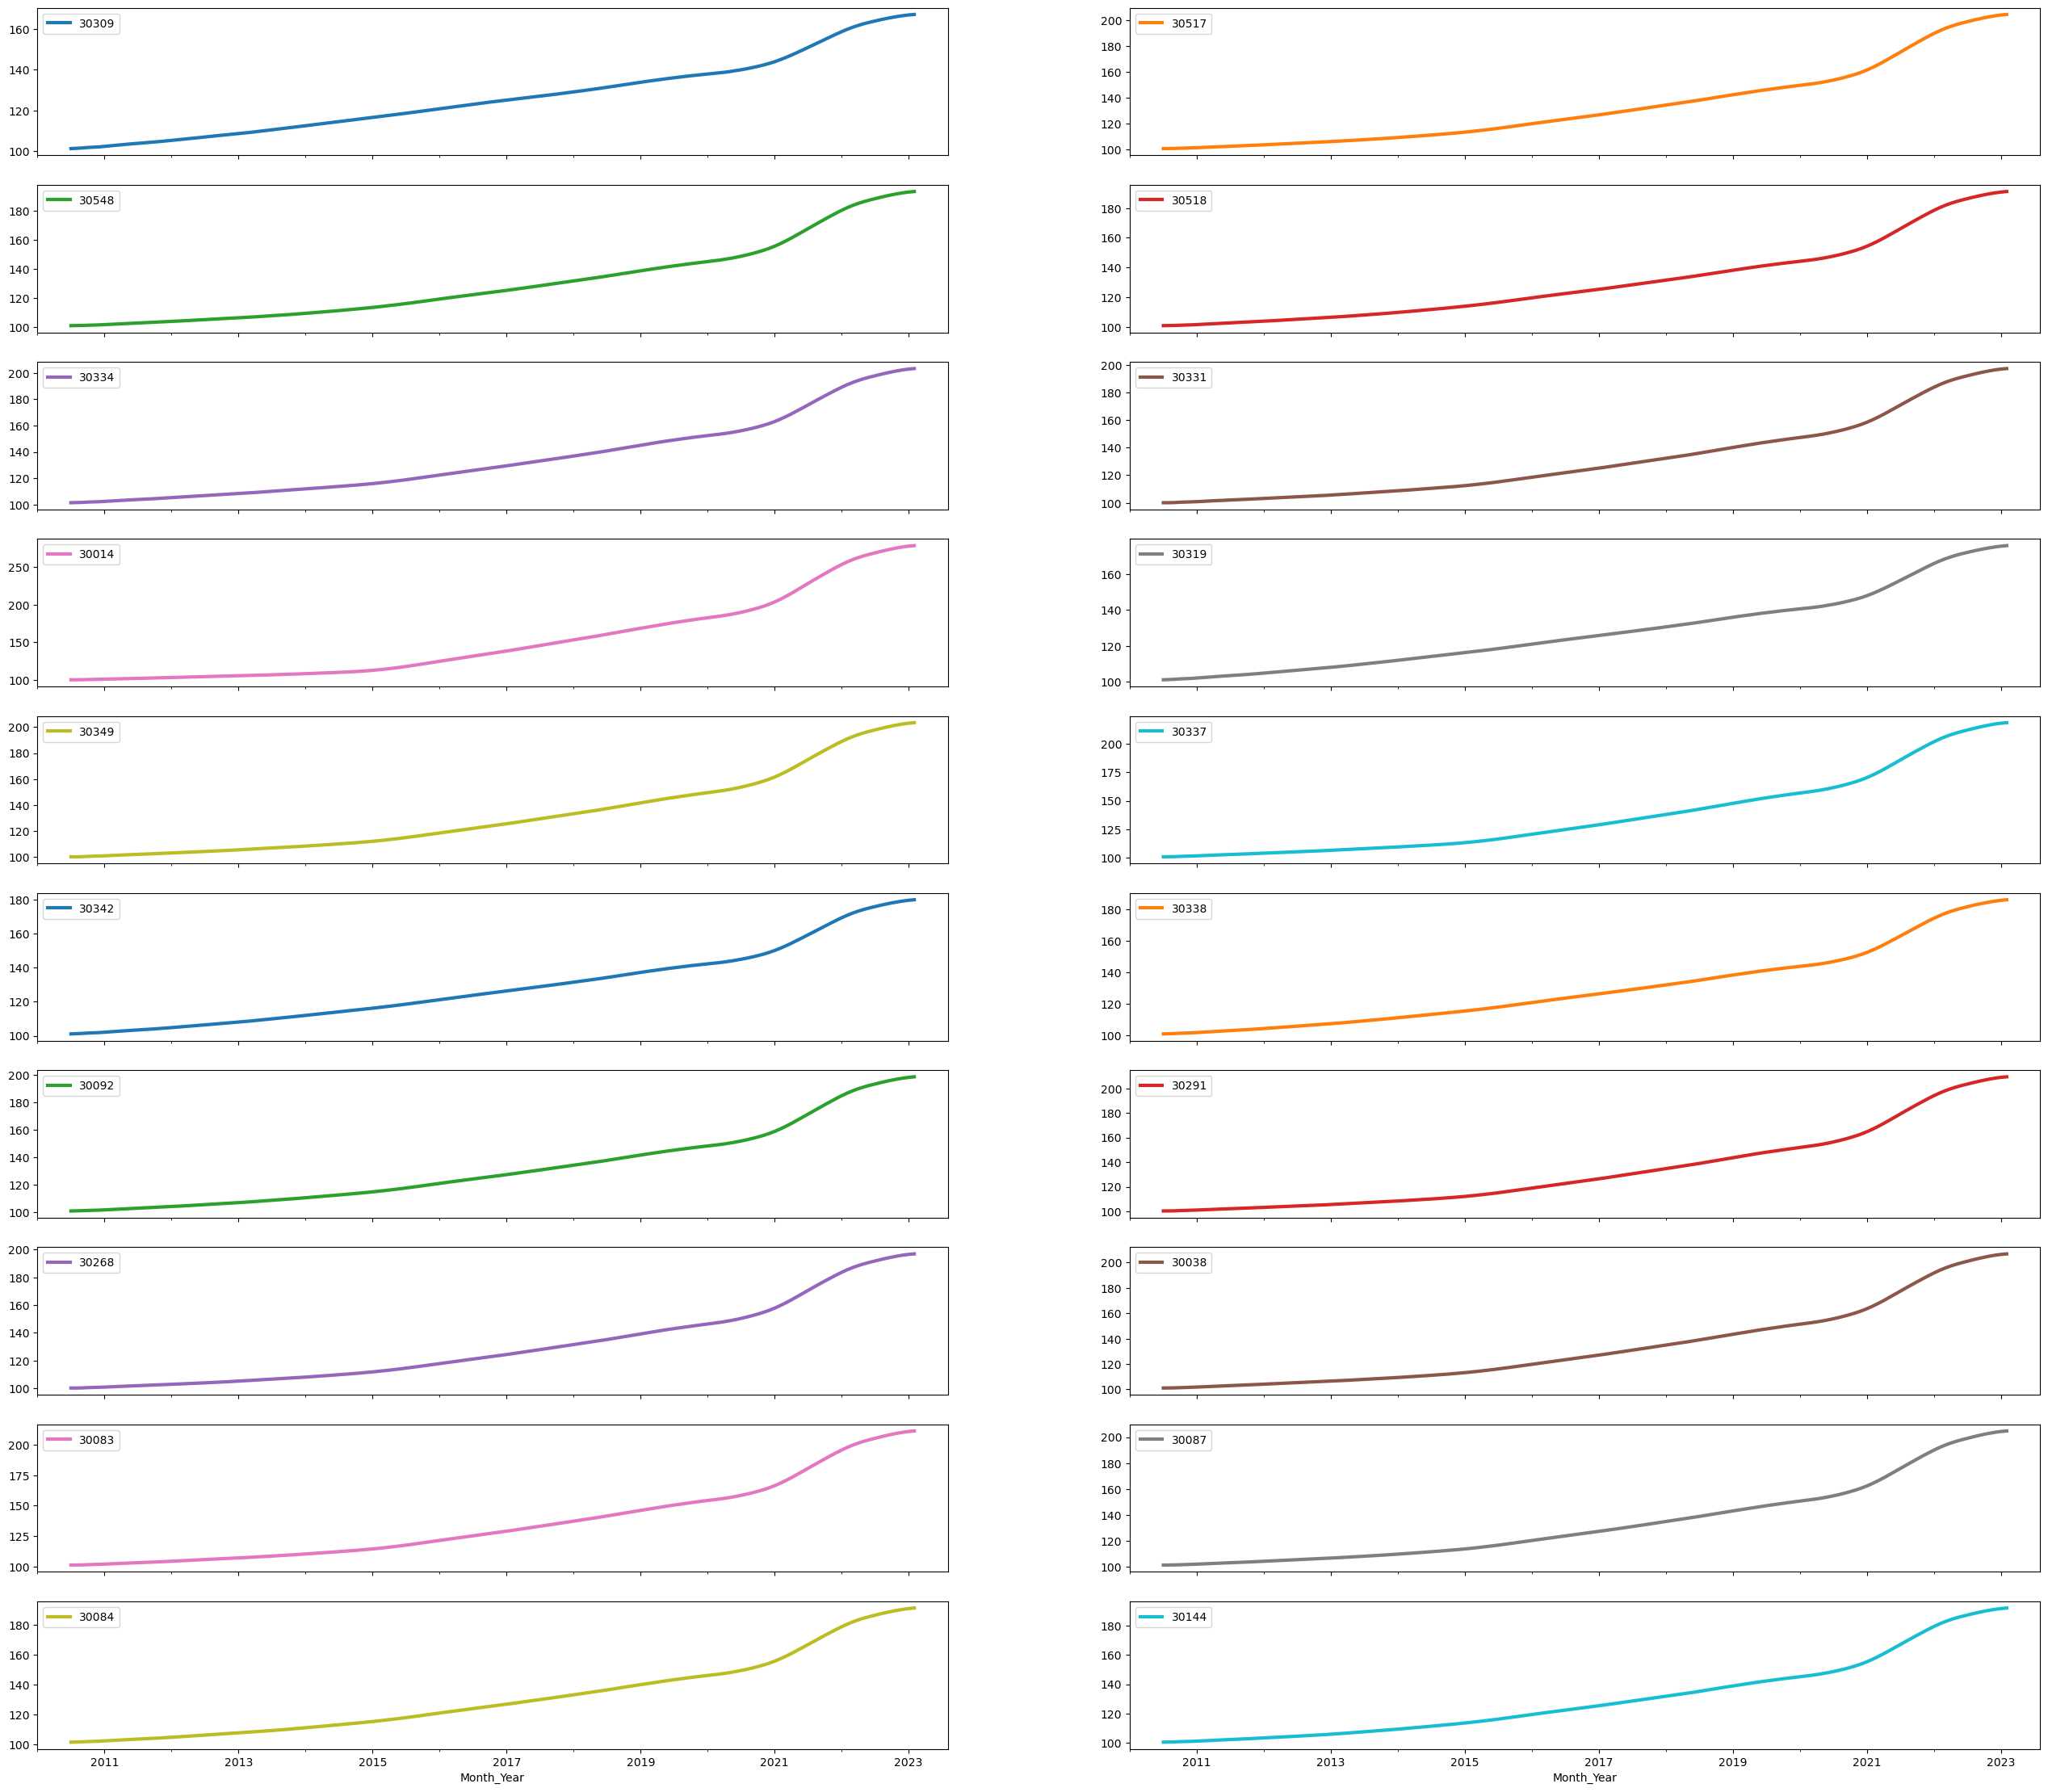

In [84]:
trend_dict = {}

for ts in unique_zc_subset:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    trend_dict[ts] = decompositions.trend


pd.DataFrame(trend_dict).plot(subplots=True, layout=(10, 2), linewidth=3);

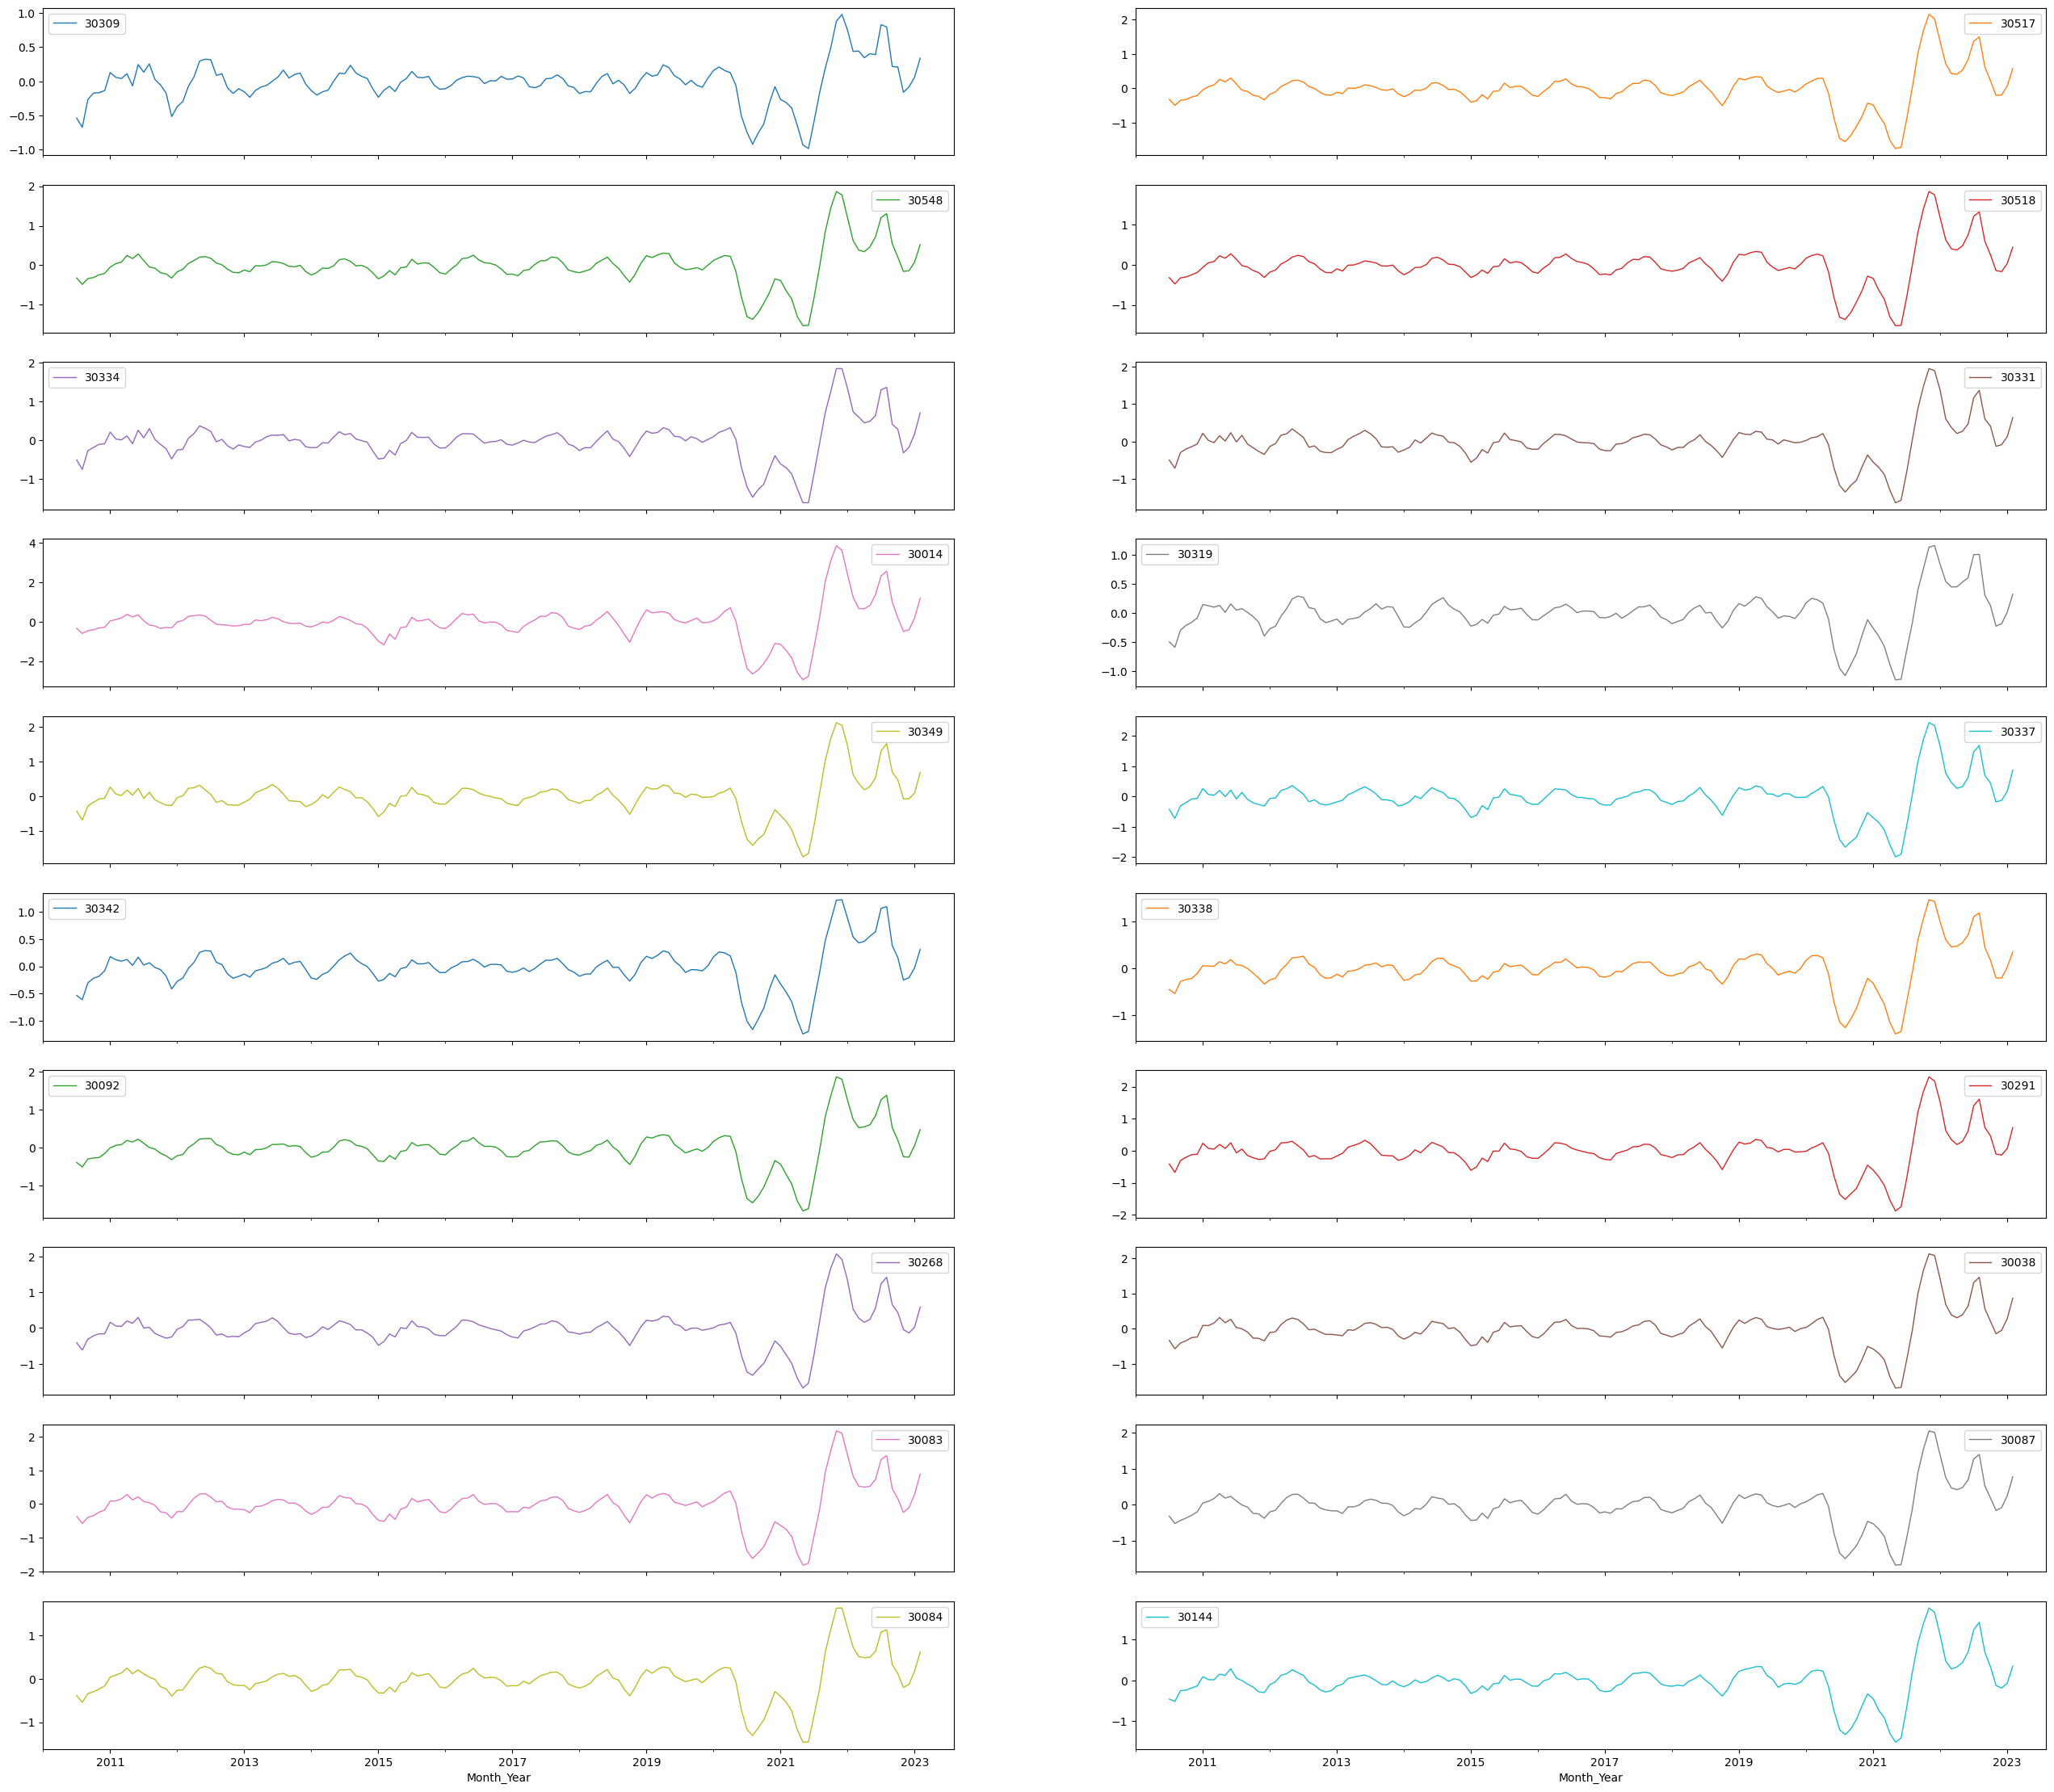

In [86]:
resid_noise = {}


for ts in unique_zc_subset:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    resid_noise[ts] = decompositions.resid
    
pd.DataFrame(resid_noise).plot(subplots=True, layout=(10, 2), linewidth=1);
